In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from nltk.corpus import stopwords
stop_list = set(stopwords.words('english'))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmajeed2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mmajeed2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mmajeed2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mmajeed2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def text_preprocess(value):
    value['text'] = value['text'].str.lower() #lowercase all words
    value['text']=value['text'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 2)) #remove word less than 2 char
    value['text'] = value['text'].str.replace(r'\d+','') #removing numbers
    value['text'] = value['text'].str.replace(r'[ ](?=[ ])|[^-_,A-Za-z0-9 ]+', "") #removing special characters 
    value['tokenized_sentences'] = value.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
    value['tokenized_sentences']= value['tokenized_sentences'].apply(lambda x: [item for item in x if item not in stop_list]) #removing stopwords
    value['tokenized_sentences'] = value['tokenized_sentences'].apply(lambda x : [stemmer.stem(y) for y in x]) #stemming 
    value['tokenized_sentences'] = value['tokenized_sentences'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lemmatizing 
    value['clean_text'] = value['tokenized_sentences'].str.join(' ') #converting back to normal string from tokenized string 
    return value

In [3]:
from sklearn.preprocessing import LabelEncoder

def encode_topic(dataframe):
    encoder = LabelEncoder()
    dataframe['topicEncoded'] = encoder.fit_transform(dataframe['topic'])
    dataframe['text'] = dataframe['text'].apply(lambda text: str(text).lower())
    return dataframe

In [4]:
df_cnn=pd.read_csv('nov_23_df_cnn_topic_combined.csv')
df_cnn.head()


,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic
0,0,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,Another employee exodus appears to be underway...,31.0,corporatenews
1,1,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,Amazon CEO Andy Jassy said job cuts at the e-c...,36.0,corporatenews
2,2,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,Max Verstappen and Red Bull have hit out at on...,37.0,corporatenews
3,3,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,Here are 5⃣ things you need to know today 👇\n1...,45.0,corporatenews
4,4,CNN,It’s our job to #GoThere & tell the most diffi...,NaN,#RIPTwitter was the top trend worldwide on Thu...,53.0,corporatenews


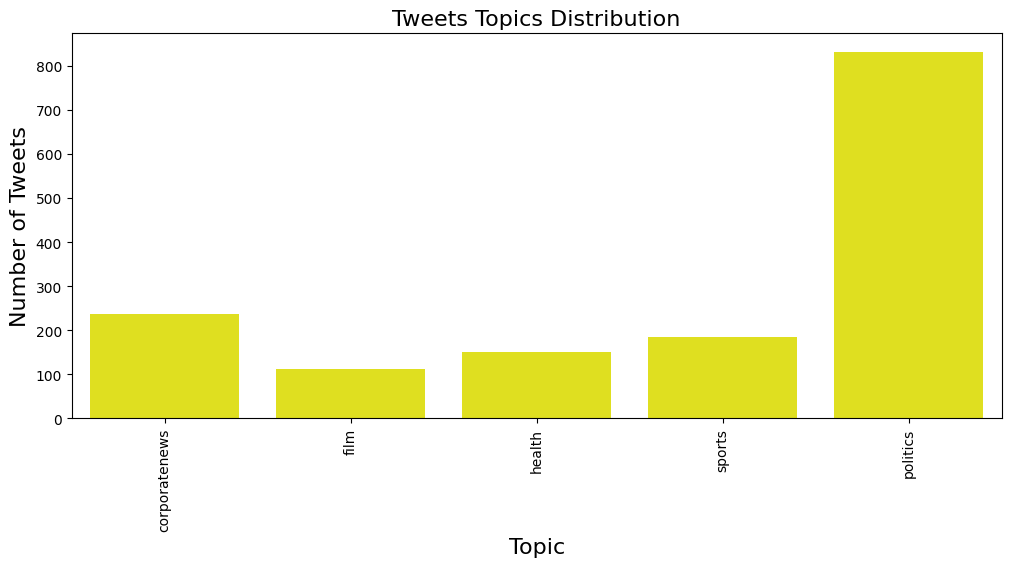

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_cnn.topic, color='yellow')
plt.title('Tweets Topics Distribution', fontsize=16)
plt.ylabel('Number of Tweets', fontsize=16)
plt.xlabel('Topic', fontsize=16)
plt.xticks(rotation='vertical');

In [6]:
df_fox=pd.read_csv('nov_23_df_fox_topic_combined.csv')
df_fox.head()

,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic
0,0,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,Elon Musk triggers liberals with ultimatum to ...,10.0,corporatenews
1,1,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,"Musk trolls AOC, liberal journalists who panic...",20.0,corporatenews
2,2,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,Twitter reportedly losing more staff members a...,52.0,corporatenews
3,3,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,Sen. Markey warns Elon Musk will 'pay a price'...,63.0,corporatenews
4,4,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,Surge in Twitter fact-checks of progressive fi...,81.0,corporatenews


In [7]:
df_reuters=pd.read_csv('nov_23_df_reuters_topic_combined.csv')
df_reuters.head()

,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic
0,0,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,Italy court rejects Google's appeal against wa...,0.0,corporatenews
1,1,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,Jaguar Land Rover turns to laid-off tech worke...,4.0,corporatenews
2,2,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,Indian food delivery firm Zomato's co-founder ...,12.0,corporatenews
3,3,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,Companies are setting minimum prices on their ...,16.0,corporatenews
4,4,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,Twitter has reinstated the accounts of U.S. co...,17.0,corporatenews


In [8]:
print(df_cnn.shape)
print(df_fox.shape)
print(df_reuters.shape)

(1517, 7)
(1584, 7)
(1332, 7)


#Encoding the topic

In [9]:
df_cnn=encode_topic(df_cnn)
df_fox=encode_topic(df_fox)
df_reuters=encode_topic(df_reuters)

#clean the tweet text: Data Preprocessing 

In [10]:
df_cnn = text_preprocess(df_cnn)
df_fox = text_preprocess(df_fox)
df_reuters=text_preprocess(df_reuters)

C:\Users\mmajeed2\AppData\Local\Temp\ipykernel_12328\836048016.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  value['text'] = value['text'].str.replace(r'\d+','') #removing numbers
C:\Users\mmajeed2\AppData\Local\Temp\ipykernel_12328\836048016.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  value['text'] = value['text'].str.replace(r'[ ](?=[ ])|[^-_,A-Za-z0-9 ]+', "") #removing special characters
C:\Users\mmajeed2\AppData\Local\Temp\ipykernel_12328\836048016.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  value['text'] = value['text'].str.replace(r'\d+','') #removing numbers
C:\Users\mmajeed2\AppData\Local\Temp\ipykernel_12328\836048016.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  value['text'] = value['text'].str.replace(r'[ ](?=[ ])|[^-_,A-Za-z0-9 ]+', "") #removing s

#saving the preprocessed dataset, wil be using this in the future

In [11]:
df_cnn.to_csv('preprocessed_nov_23_df_cnn_topic_combined.csv')
df_fox.to_csv('preprocessed_nov_23_df_fox_topic_combined.csv')
df_reuters.to_csv('preprocessed_nov_23_df_reuters_topic_combined.csv')

#Vectoriser

In [12]:
v = TfidfVectorizer(max_features=2500) #Initializnig the TF-IDF Vectorizer 

#Defining the independent and dependent vectors for all three datasets

In [13]:
X_left = v.fit_transform(df_cnn['clean_text']).toarray()
X_right= v.fit_transform(df_fox['clean_text']).toarray()
X_neutral=v.fit_transform(df_reuters['clean_text']).toarray()
y_left=df_cnn['topicEncoded']
y_right=df_fox['topicEncoded']
y_nuetral=df_reuters['topicEncoded']

In [14]:
print(X_left.shape)
print(X_right.shape)
print(X_neutral.shape)

(1517, 2500)
(1584, 2500)
(1332, 2500)


In [15]:
df_cnn['topicEncoded'].value_counts()

3    832
0    237
4    184
2    151
1    113
Name: topicEncoded, dtype: int64

In [16]:
df_fox['topicEncoded'].value_counts()

3    1051
4     253
2     118
0     114
1      48
Name: topicEncoded, dtype: int64

In [17]:
df_reuters['topicEncoded'].value_counts()

3    441
0    299
4    272
2    213
1    107
Name: topicEncoded, dtype: int64

In [18]:
def print_evaluators(test,pred):
    print(classification_report(test,pred)) #Using classification_report function to get the summary of how good the classifier is 
    print(accuracy_score(test, pred)) #Using accuracy_score function to get the overall accuracy
    

# training it on left and testing it on right

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [20]:
classifier_auto.fit(X_left, y_left) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [21]:
print(X_left.shape)
print(y_left.shape)

(1517, 2500)
(1517,)


In [22]:
# from yellowbrick.model_selection import learning_curve
# print(learning_curve(RandomForestClassifier(n_estimators=1000, random_state=0) , X_left, y_left, cv=10, scoring='accuracy'))

In [23]:
y_pred_right = classifier_auto.predict(X_right)

In [24]:
print_evaluators(y_right,y_pred_right)

              precision    recall  f1-score   support

           0       0.10      0.02      0.03       114
           1       0.05      0.06      0.06        48
           2       0.10      0.03      0.05       118
           3       0.66      0.90      0.76      1051
           4       0.18      0.02      0.03       253

    accuracy                           0.61      1584
   macro avg       0.22      0.21      0.19      1584
weighted avg       0.48      0.61      0.52      1584

0.6066919191919192


# Training it on the left and testing it on the nuetral

In [25]:
y_pred_nuetral = classifier_auto.predict(X_neutral)

In [26]:
print_evaluators(y_nuetral,y_pred_nuetral)

              precision    recall  f1-score   support

           0       0.16      0.04      0.06       299
           1       0.50      0.21      0.30       107
           2       0.46      0.08      0.14       213
           3       0.34      0.87      0.49       441
           4       0.42      0.07      0.12       272

    accuracy                           0.34      1332
   macro avg       0.38      0.25      0.22      1332
weighted avg       0.35      0.34      0.25      1332

0.3400900900900901


# Training on Left and testing it on left

In [27]:
from sklearn.model_selection import train_test_split
X_left_train, X_left_test , y_left_train, y_left_test = train_test_split(X_left, y_left , test_size = 0.30)

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [29]:
classifier_auto.fit(X_left_train, y_left_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [30]:
y_pred_left = classifier_auto.predict(X_left_test)

In [31]:
print_evaluators(y_left_test,y_pred_left)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        66
           1       1.00      0.72      0.84        29
           2       1.00      0.69      0.82        45
           3       0.83      0.99      0.91       257
           4       0.97      0.63      0.76        59

    accuracy                           0.88       456
   macro avg       0.95      0.78      0.85       456
weighted avg       0.90      0.88      0.88       456

0.881578947368421


# Training it on the nuetral data and testing it on the nuetral data

In [32]:
X_nuetral=X_neutral

In [33]:
from sklearn.model_selection import train_test_split
X_nuetral_train, X_nuetral_test , y_nuetral_train, y_nuetral_test = train_test_split(X_nuetral, y_nuetral , test_size = 0.30)

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [35]:
# from yellowbrick.model_selection import learning_curve
# print(learning_curve(RandomForestClassifier(n_estimators=1000, random_state=0) , X_nuetral, y_nuetral, cv=10, scoring='accuracy'))

In [36]:
classifier_auto.fit(X_nuetral_train, y_nuetral_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [37]:
y_pred_nuetral = classifier_auto.predict(X_nuetral_test)

In [38]:
print_evaluators(y_nuetral_test,y_pred_nuetral)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        99
           1       0.92      0.77      0.84        31
           2       0.95      0.85      0.90        61
           3       0.89      0.98      0.93       133
           4       0.95      0.91      0.93        76

    accuracy                           0.93       400
   macro avg       0.94      0.90      0.92       400
weighted avg       0.93      0.93      0.93       400

0.9325


# Training it on the nuetral data and test it on the left data

In [39]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [40]:
classifier_auto.fit(X_nuetral, y_nuetral) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [41]:
y_pred_left = classifier_auto.predict(X_left)

In [42]:
print_evaluators(y_left,y_pred_left)

              precision    recall  f1-score   support

           0       0.16      0.03      0.06       237
           1       0.52      0.20      0.29       113
           2       0.14      0.13      0.14       151
           3       0.56      0.81      0.66       832
           4       0.08      0.04      0.05       184

    accuracy                           0.48      1517
   macro avg       0.29      0.24      0.24      1517
weighted avg       0.40      0.48      0.41      1517

0.48055372445616346


# Training it on the nuetral and test it on the right data

In [43]:
y_pred_right = classifier_auto.predict(X_right)

In [44]:
print_evaluators(y_right,y_pred_right)

              precision    recall  f1-score   support

           0       0.08      0.11      0.09       114
           1       0.00      0.00      0.00        48
           2       0.08      0.08      0.08       118
           3       0.71      0.81      0.75      1051
           4       0.29      0.07      0.11       253

    accuracy                           0.56      1584
   macro avg       0.23      0.21      0.21      1584
weighted avg       0.53      0.56      0.53      1584

0.5625


# Training it on Right and test it on left

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [46]:
classifier_auto.fit(X_right, y_right)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [47]:
y_pred_left = classifier_auto.predict(X_left)

In [48]:
print_evaluators(y_left,y_pred_left)

              precision    recall  f1-score   support

           0       0.20      0.03      0.04       237
           1       0.00      0.00      0.00       113
           2       0.17      0.06      0.09       151
           3       0.55      0.90      0.68       832
           4       0.12      0.04      0.06       184

    accuracy                           0.51      1517
   macro avg       0.21      0.20      0.18      1517
weighted avg       0.36      0.51      0.40      1517

0.5062623599208965


# Training it on right and test it on nuetral data

In [49]:
y_pred_nuetral = classifier_auto.predict(X_nuetral)

In [50]:
print_evaluators(y_nuetral,y_pred_nuetral)

              precision    recall  f1-score   support

           0       0.08      0.01      0.02       299
           1       0.00      0.00      0.00       107
           2       0.09      0.03      0.05       213
           3       0.33      0.84      0.47       441
           4       0.02      0.01      0.01       272

    accuracy                           0.29      1332
   macro avg       0.11      0.18      0.11      1332
weighted avg       0.15      0.29      0.17      1332

0.2875375375375375


# Training it on right side and test it on the right side

In [51]:
from sklearn.model_selection import train_test_split
X_right_train, X_right_test , y_right_train, y_right_test = train_test_split(X_right, y_right , test_size = 0.30)

In [52]:
from sklearn.ensemble import RandomForestClassifier

classifier_auto = RandomForestClassifier(n_estimators=1000, random_state=0) #Initializing classifier

In [53]:
# from yellowbrick.model_selection import learning_curve
# print(learning_curve(RandomForestClassifier(n_estimators=1000, random_state=0) , X_right, y_right, cv=10, scoring='accuracy'))

In [54]:
classifier_auto.fit(X_right_train, y_right_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [55]:
y_pred_right = classifier_auto.predict(X_right_test)

In [56]:
print_evaluators(y_right_test,y_pred_right)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       1.00      0.58      0.74        12
           2       0.93      0.96      0.94        26
           3       0.92      0.99      0.95       337
           4       0.98      0.79      0.88        71

    accuracy                           0.93       476
   macro avg       0.95      0.81      0.86       476
weighted avg       0.93      0.93      0.93       476

0.930672268907563
